In [4]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot ,iplot
import cufflinks as cf
import seaborn as sb


In [5]:
# !pip install cufflinks

In [6]:
df1=pd.read_excel('E:/Full Stack Data Scientist Bootcamp/webapp project/project-2/Data_Train.xlsx')
df2=pd.read_excel('E:/Full Stack Data Scientist Bootcamp/webapp project/project-2/Test_set.xlsx')

In [7]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Automated EDA

In [8]:
# !pip install Pandas-Profiling

In [9]:
import pandas_profiling as pf

C:\Users\Muhammad Talha Awan\AppData\Local\Temp\ipykernel_6468\3468475291.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [10]:
# pf.ProfileReport(df1)

### Manual EDA

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
df1.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
df1.dropna(how='any',axis=0,inplace=True)

In [14]:
df1.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#####  Coverting the df1['Date_of_Journey'] column into their correct format

In [16]:
df1['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [17]:
df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'])

E:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

In [18]:
df1.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [19]:

df1['Day_of_journey']=(df1['Date_of_Journey']).dt.day
df1['Month_of_journey']=(df1['Date_of_Journey']).dt.month

In [20]:
df1.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [21]:
# Now we don't need the Date_of_Journey column so Remove the this coloumn
df1.drop('Date_of_Journey',axis=1,inplace=True)
df1.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


##### Coverting the df1['Dep Time'] column into their correct format

In [22]:
# Now perform the above work for the Date of Date_time Columns
df1['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10682, dtype: object

In [23]:
df1['Dep_Time']=pd.to_datetime(df1['Dep_Time'])
df1.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-05 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-05 05:50:00,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-03-05 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,6,9


In [24]:
df1['Dep_hr']=df1['Dep_Time'].dt.hour
df1['Dep_min']=df1['Dep_Time'].dt.minute

In [25]:
df1.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-05 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-05 05:50:00,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-03-05 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25


In [26]:
df1.drop('Dep_Time',axis=1,inplace=True)

In [27]:
df1.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25


##### Coverting the df1['Arrival_Time'] column into their correct format

In [28]:
df1['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [29]:
df1['Arrival_Time']=pd.to_datetime(df1['Arrival_Time'])
df1['Arrival_Time']

0       2023-03-22 01:10:00
1       2023-03-05 13:15:00
2       2023-06-10 04:25:00
3       2023-03-05 23:30:00
4       2023-03-05 21:35:00
                ...        
10678   2023-03-05 22:25:00
10679   2023-03-05 23:20:00
10680   2023-03-05 11:20:00
10681   2023-03-05 14:10:00
10682   2023-03-05 19:15:00
Name: Arrival_Time, Length: 10682, dtype: datetime64[ns]

In [30]:
df1['Arrival_hr']=(df1['Arrival_Time']).dt.hour
df1['Arrival_min']=(df1['Arrival_Time']).dt.minute

In [31]:
df1.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-05 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25


In [32]:
df1.drop('Arrival_Time',axis=1,inplace=True)
df1.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


#####  Converting the Duration column into the correct formate

In [33]:
df1['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [34]:
# df1['Duration']=pd.to_datetime(df1['Duration'])
# df1['Duration']

duration=df1['Duration'].str.split(' ',expand=True)
duration[1].fillna('00m',inplace=True)

df1['duration_hr']=duration[0].apply(lambda x:x[:-1])
df1['duration_min']=duration[1].apply(lambda x:x[:-1])

In [35]:
duration

,0,1
0,2h,50m
1,7h,25m
2,19h,00m
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,00m
10681,2h,40m


In [36]:
df1.tail(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20,3,00
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10,2,40
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,5,9,10,55,19,15,8,20


In [37]:
df1.drop('Duration',inplace=True,axis=1)
df1.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00


####  Price Vs Airline

In [38]:
df1['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [39]:
Airline_Price=df1.groupby(['Airline','Price']).size().reset_index()
Airline_Price

,Airline,Price,0
0,Air Asia,3383,31
1,Air Asia,3782,4
2,Air Asia,3807,19
3,Air Asia,4082,3
4,Air Asia,4107,11
...,...,...,...
1973,Vistara,21520,1
1974,Vistara,21730,2
1975,Vistara Premium economy,5969,1
1976,Vistara Premium economy,9125,1


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Airline'>

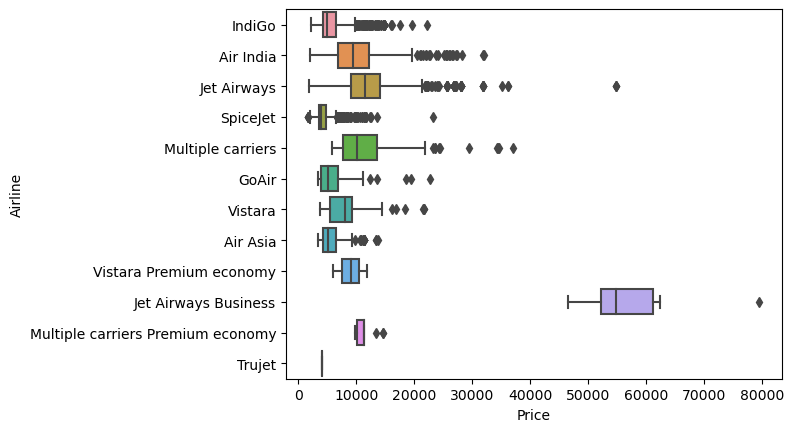

In [40]:
# sb.boxplot(Airline_Price['Price'],Airline_Price['Airline'],orient='h')
sb.boxplot(df1['Price'],df1['Airline'],orient='h')

(array([3.804e+03, 3.849e+03, 8.180e+02, 1.196e+03, 1.940e+02, 4.790e+02,
        3.190e+02, 3.000e+00, 6.000e+00, 1.400e+01]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

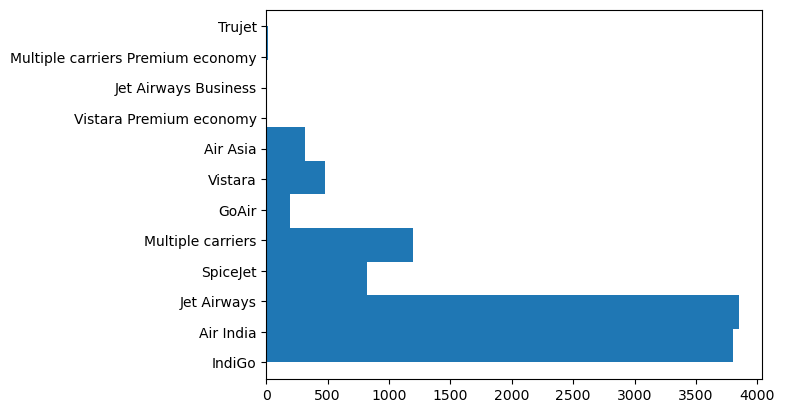

In [41]:
plt.hist(df1['Airline'],orientation='horizontal')

(array([6.028e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <BarContainer object of 10 artists>)

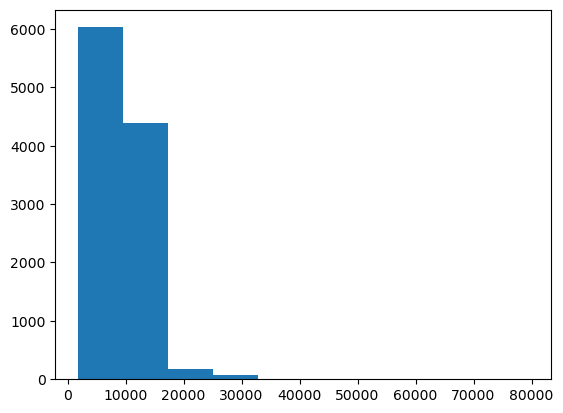

In [42]:
plt.hist(df1['Price'],orientation='vertical')

In [43]:
# Graph between the AirLine count
df1['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

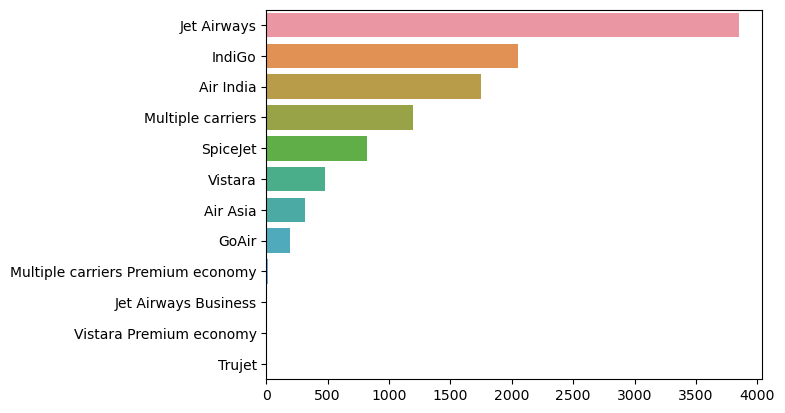

In [44]:
sb.barplot(df1['Airline'].value_counts().values ,df1['Airline'].value_counts().index ,orient='h')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Airline'>

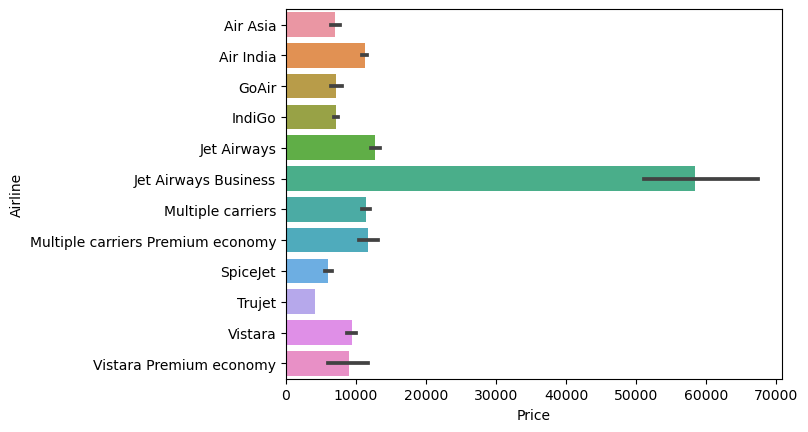

In [45]:
sb.barplot(Airline_Price['Price'],Airline_Price['Airline']  ,orient='h')

In [46]:
Air_Price=df1.groupby('Airline')['Price'].mean().sort_values()
Air_Price

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='Airline'>

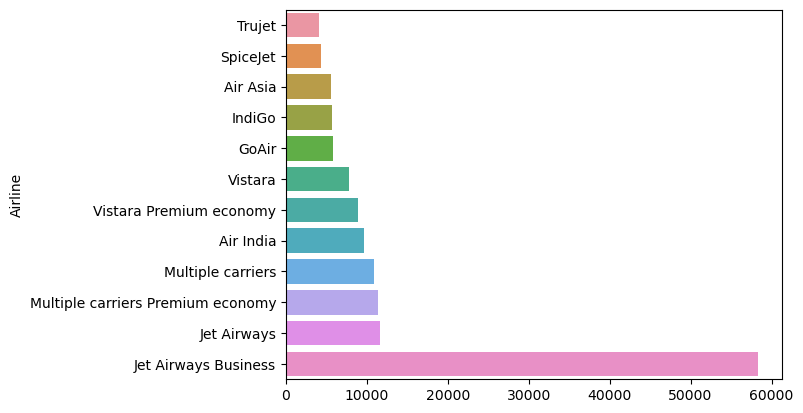

In [47]:
sb.barplot(Air_Price.values,Air_Price.index,orient='h')

#### Price Vs No. of Stop

In [48]:
df1.groupby(['Airline','Total_Stops']).size().reset_index()

,Airline,Total_Stops,0
0,Air Asia,1 stop,129
1,Air Asia,2 stops,9
2,Air Asia,non-stop,181
3,Air India,1 stop,540
4,Air India,2 stops,756
5,Air India,3 stops,37
6,Air India,4 stops,1
7,Air India,non-stop,417
8,GoAir,1 stop,102
9,GoAir,non-stop,92


In [49]:
Airline_Price_Stops=df1.groupby(['Airline','Total_Stops'])['Price'].mean().reset_index()
Airline_Price_Stops

,Airline,Total_Stops,Price
0,Air Asia,1 stop,7078.325581
1,Air Asia,2 stops,6341.888889
2,Air Asia,non-stop,4492.331492
3,Air India,1 stop,9041.509259
4,Air India,2 stops,12092.779101
5,Air India,3 stops,12208.054054
6,Air India,4 stops,17686.000000
7,Air India,non-stop,5605.326139
8,GoAir,1 stop,6884.676471
9,GoAir,non-stop,4726.173913


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Airline'>

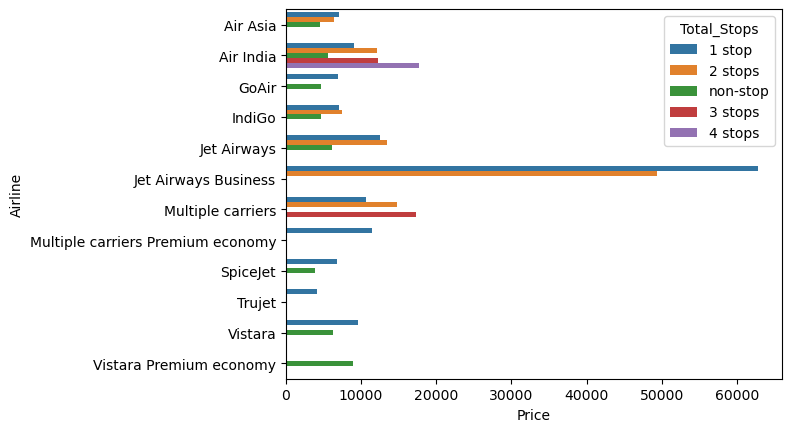

In [50]:
sb.barplot(Airline_Price_Stops['Price'],Airline_Price_Stops['Airline'],hue=Airline_Price_Stops['Total_Stops'])

#### Source VS Price

In [51]:
df1['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [52]:
df1.groupby(['Source','Airline'])['Price'].mean().sort_values(ascending=False)

Source    Airline                          
Banglore  Jet Airways Business                 62844.250000
Delhi     Jet Airways Business                 49387.500000
          Jet Airways                          12642.593317
Mumbai    Vistara                              12326.521739
Kolkata   Jet Airways                          11717.565287
Delhi     Multiple carriers Premium economy    11418.846154
Banglore  Jet Airways                          11021.732234
Delhi     Multiple carriers                    10902.678094
Kolkata   Air India                            10357.324219
Delhi     Air India                            10003.446381
Kolkata   Vistara                               9257.683060
Banglore  Air India                             9238.198795
Chennai   Vistara Premium economy               9125.000000
Banglore  Vistara Premium economy               8881.000000
Delhi     Air Asia                              7804.175000
Chennai   Vistara                               7491.372

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Source'>

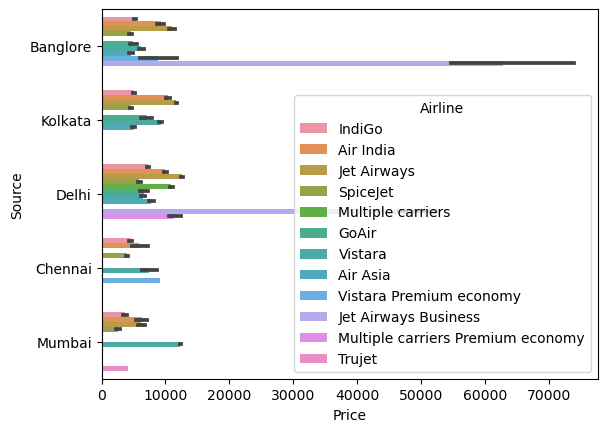

In [53]:
sb.barplot(df1['Price'],df1['Source'],hue=df1['Airline'],orient='h')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Source'>

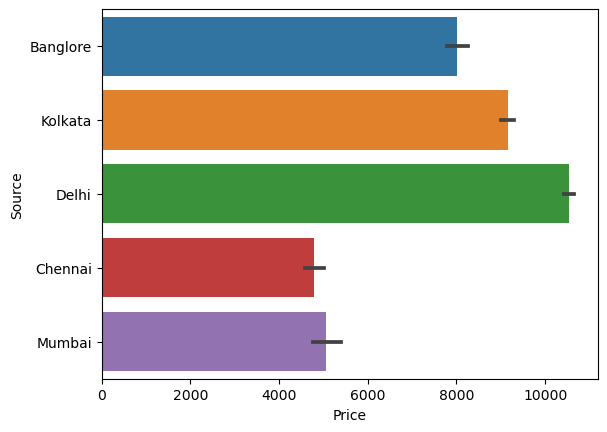

In [54]:
sb.barplot(df1['Price'],df1['Source'],data=df1['Airline'],orient='h')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Source'>

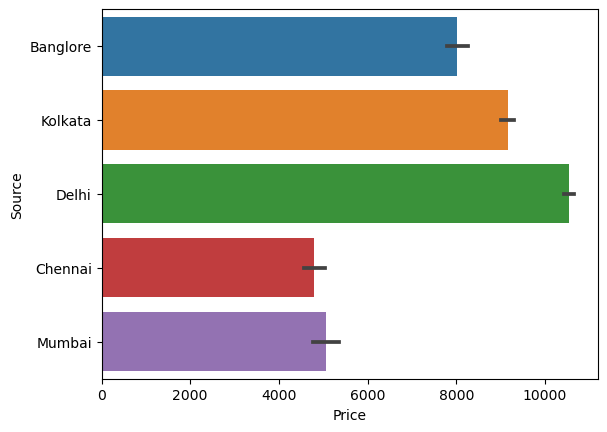

In [55]:
sb.barplot(df1['Price'],df1['Source'],data=df1.sort_values('Price'),orient='h')

####  Distination VS Price

In [56]:
df1['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [57]:
df1.groupby(['Destination','Airline'])['Price'].mean()

Destination  Airline                          
Banglore     Air Asia                              5012.320000
             Air India                            10357.324219
             GoAir                                 7047.000000
             IndiGo                                5075.235955
             Jet Airways                          11717.565287
             SpiceJet                              4642.883333
             Vistara                               9257.683060
Cochin       Air Asia                              7804.175000
             Air India                            10003.446381
             GoAir                                 6587.157895
             IndiGo                                7203.933333
             Jet Airways                          12642.593317
             Jet Airways Business                 49387.500000
             Multiple carriers                    10902.678094
             Multiple carriers Premium economy    11418.846154
        

In [58]:
df1.groupby(['Destination','Airline'])['Price'].mean().sort_values(ascending=False)

Destination  Airline                          
New Delhi    Jet Airways Business                 62844.250000
Cochin       Jet Airways Business                 49387.500000
New Delhi    Jet Airways                          15101.272727
Cochin       Jet Airways                          12642.593317
Hyderabad    Vistara                              12326.521739
New Delhi    Vistara Premium economy              11793.000000
Banglore     Jet Airways                          11717.565287
Cochin       Multiple carriers Premium economy    11418.846154
New Delhi    Air India                            11045.575472
Cochin       Multiple carriers                    10902.678094
Banglore     Air India                            10357.324219
Cochin       Air India                            10003.446381
Banglore     Vistara                               9257.683060
Kolkata      Vistara Premium economy               9125.000000
New Delhi    Vistara                               8947.388889
Cochin  

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Destination'>

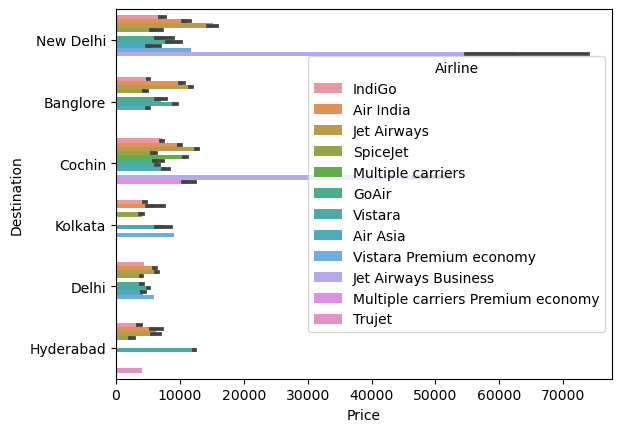

In [59]:
sb.barplot(df1['Price'],df1['Destination'],hue=df1['Airline'],orient='h')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Destination'>

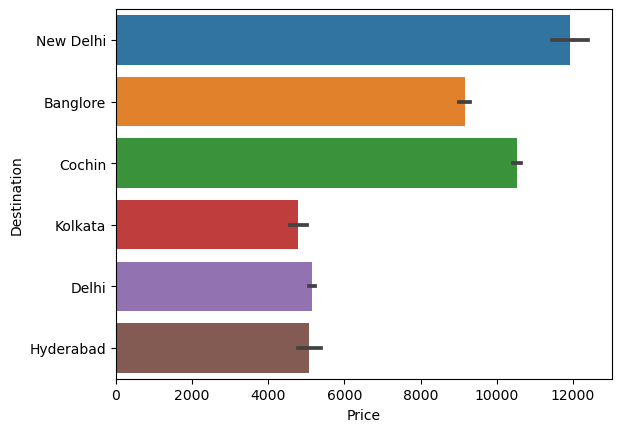

In [60]:
sb.barplot(df1['Price'],df1['Destination'],data=df1['Airline'],orient='h')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Destination'>

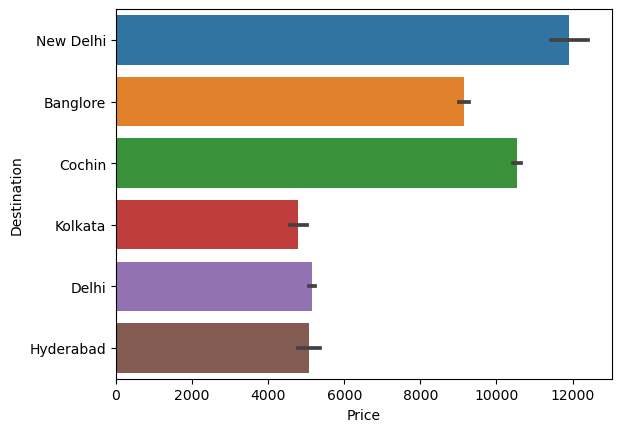

In [61]:
sb.barplot(df1['Price'],df1['Destination'],data=df1.sort_values('Price'),orient='h')

##### When we look into value_count we notices that we two categories for same name which are ( Delhi and New Delhi )
##### so now convert them into single category

In [62]:
for i in df1['Destination']:
    df1['Destination'].replace('New Delhi','Delhi',inplace=True)

In [63]:
df1['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [64]:
df1.groupby(['Destination','Airline'])['Price'].mean()

Destination  Airline                          
Banglore     Air Asia                              5012.320000
             Air India                            10357.324219
             GoAir                                 7047.000000
             IndiGo                                5075.235955
             Jet Airways                          11717.565287
             SpiceJet                              4642.883333
             Vistara                               9257.683060
Cochin       Air Asia                              7804.175000
             Air India                            10003.446381
             GoAir                                 6587.157895
             IndiGo                                7203.933333
             Jet Airways                          12642.593317
             Jet Airways Business                 49387.500000
             Multiple carriers                    10902.678094
             Multiple carriers Premium economy    11418.846154
        

In [65]:
df1.groupby(['Destination','Airline'])['Price'].mean().sort_values(ascending=False)

Destination  Airline                          
Delhi        Jet Airways Business                 62844.250000
Cochin       Jet Airways Business                 49387.500000
             Jet Airways                          12642.593317
Hyderabad    Vistara                              12326.521739
Banglore     Jet Airways                          11717.565287
Cochin       Multiple carriers Premium economy    11418.846154
Delhi        Jet Airways                          11021.732234
Cochin       Multiple carriers                    10902.678094
Banglore     Air India                            10357.324219
Cochin       Air India                            10003.446381
Banglore     Vistara                               9257.683060
Delhi        Air India                             9238.198795
Kolkata      Vistara Premium economy               9125.000000
Delhi        Vistara Premium economy               8881.000000
Cochin       Air Asia                              7804.175000
Kolkata 

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Destination'>

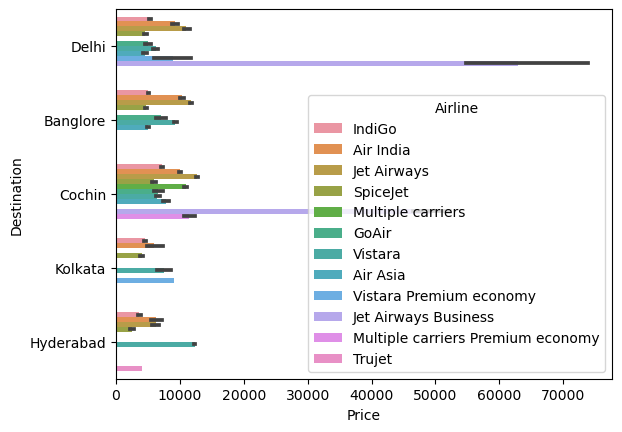

In [66]:
sb.barplot(df1['Price'],df1['Destination'],hue=df1['Airline'],orient='h')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Destination'>

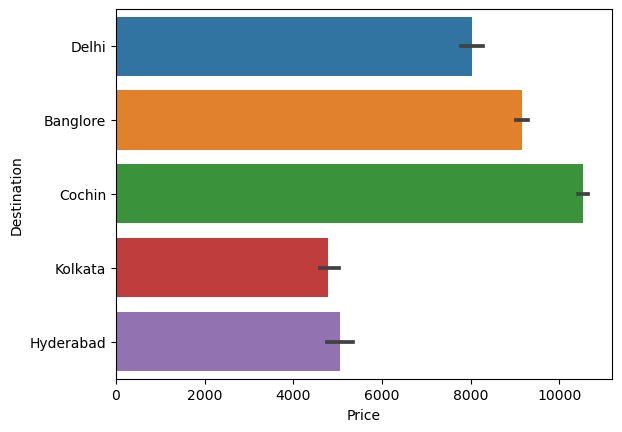

In [67]:
sb.barplot(df1['Price'],df1['Destination'],data=df1['Airline'],orient='h')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price', ylabel='Destination'>

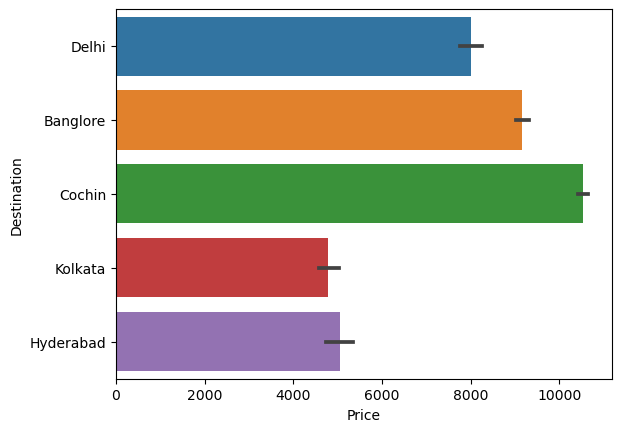

In [68]:
sb.barplot(df1['Price'],df1['Destination'],data=df1.sort_values('Price'),orient='h')

<AxesSubplot:>

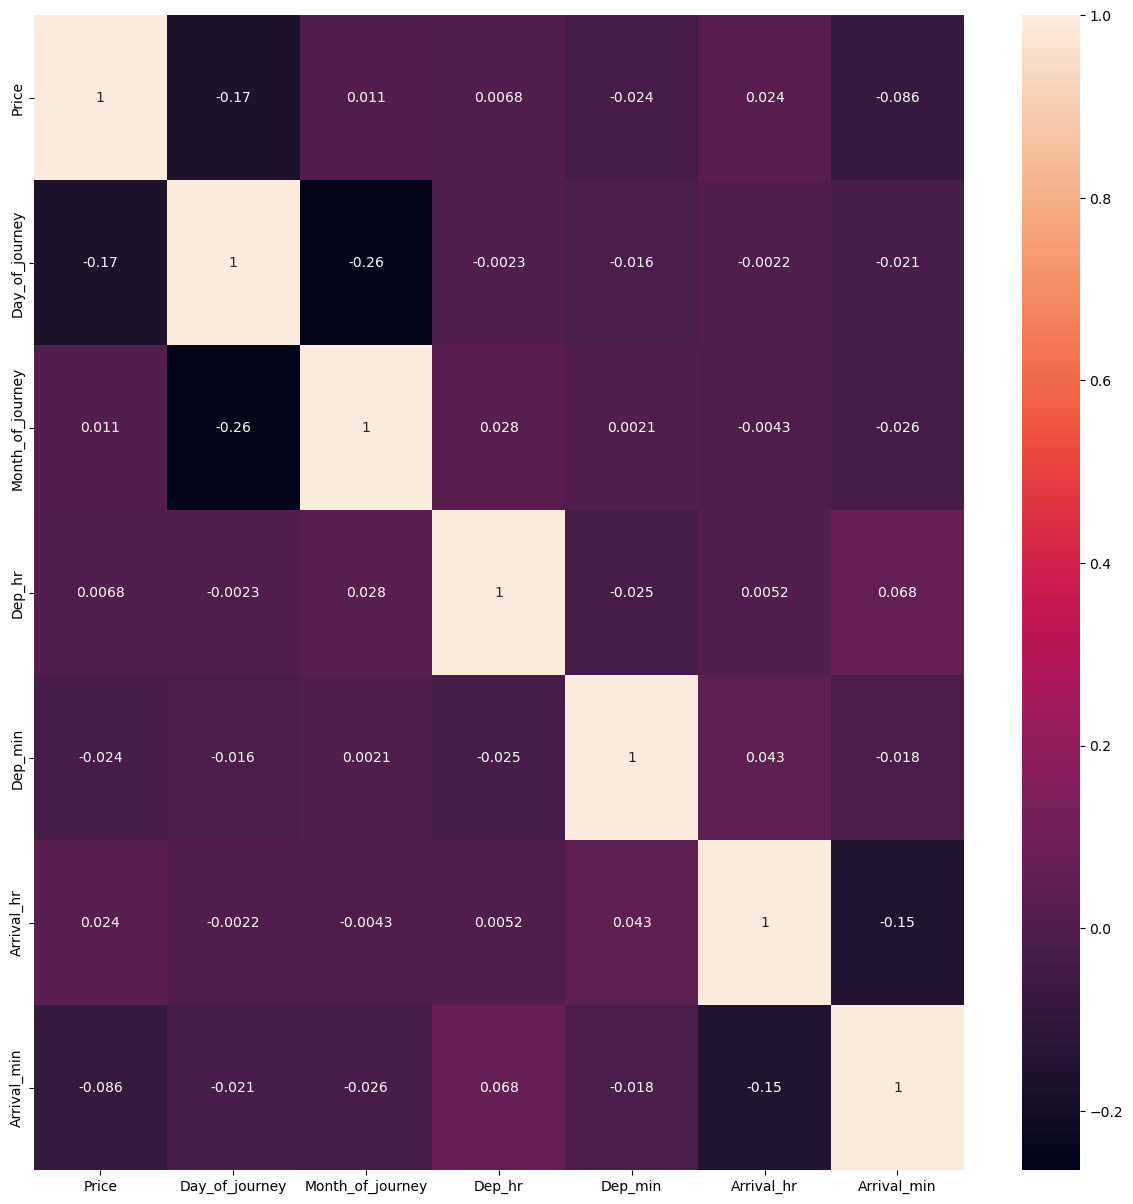

In [69]:
plt.figure(figsize=(15,15))
sb.heatmap(df1.corr(),annot=True)

### Appling the One Hot Encoding are making the dummies_variables

In [70]:
df1.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_journey       int64
Month_of_journey     int64
Dep_hr               int64
Dep_min              int64
Arrival_hr           int64
Arrival_min          int64
duration_hr         object
duration_min        object
dtype: object

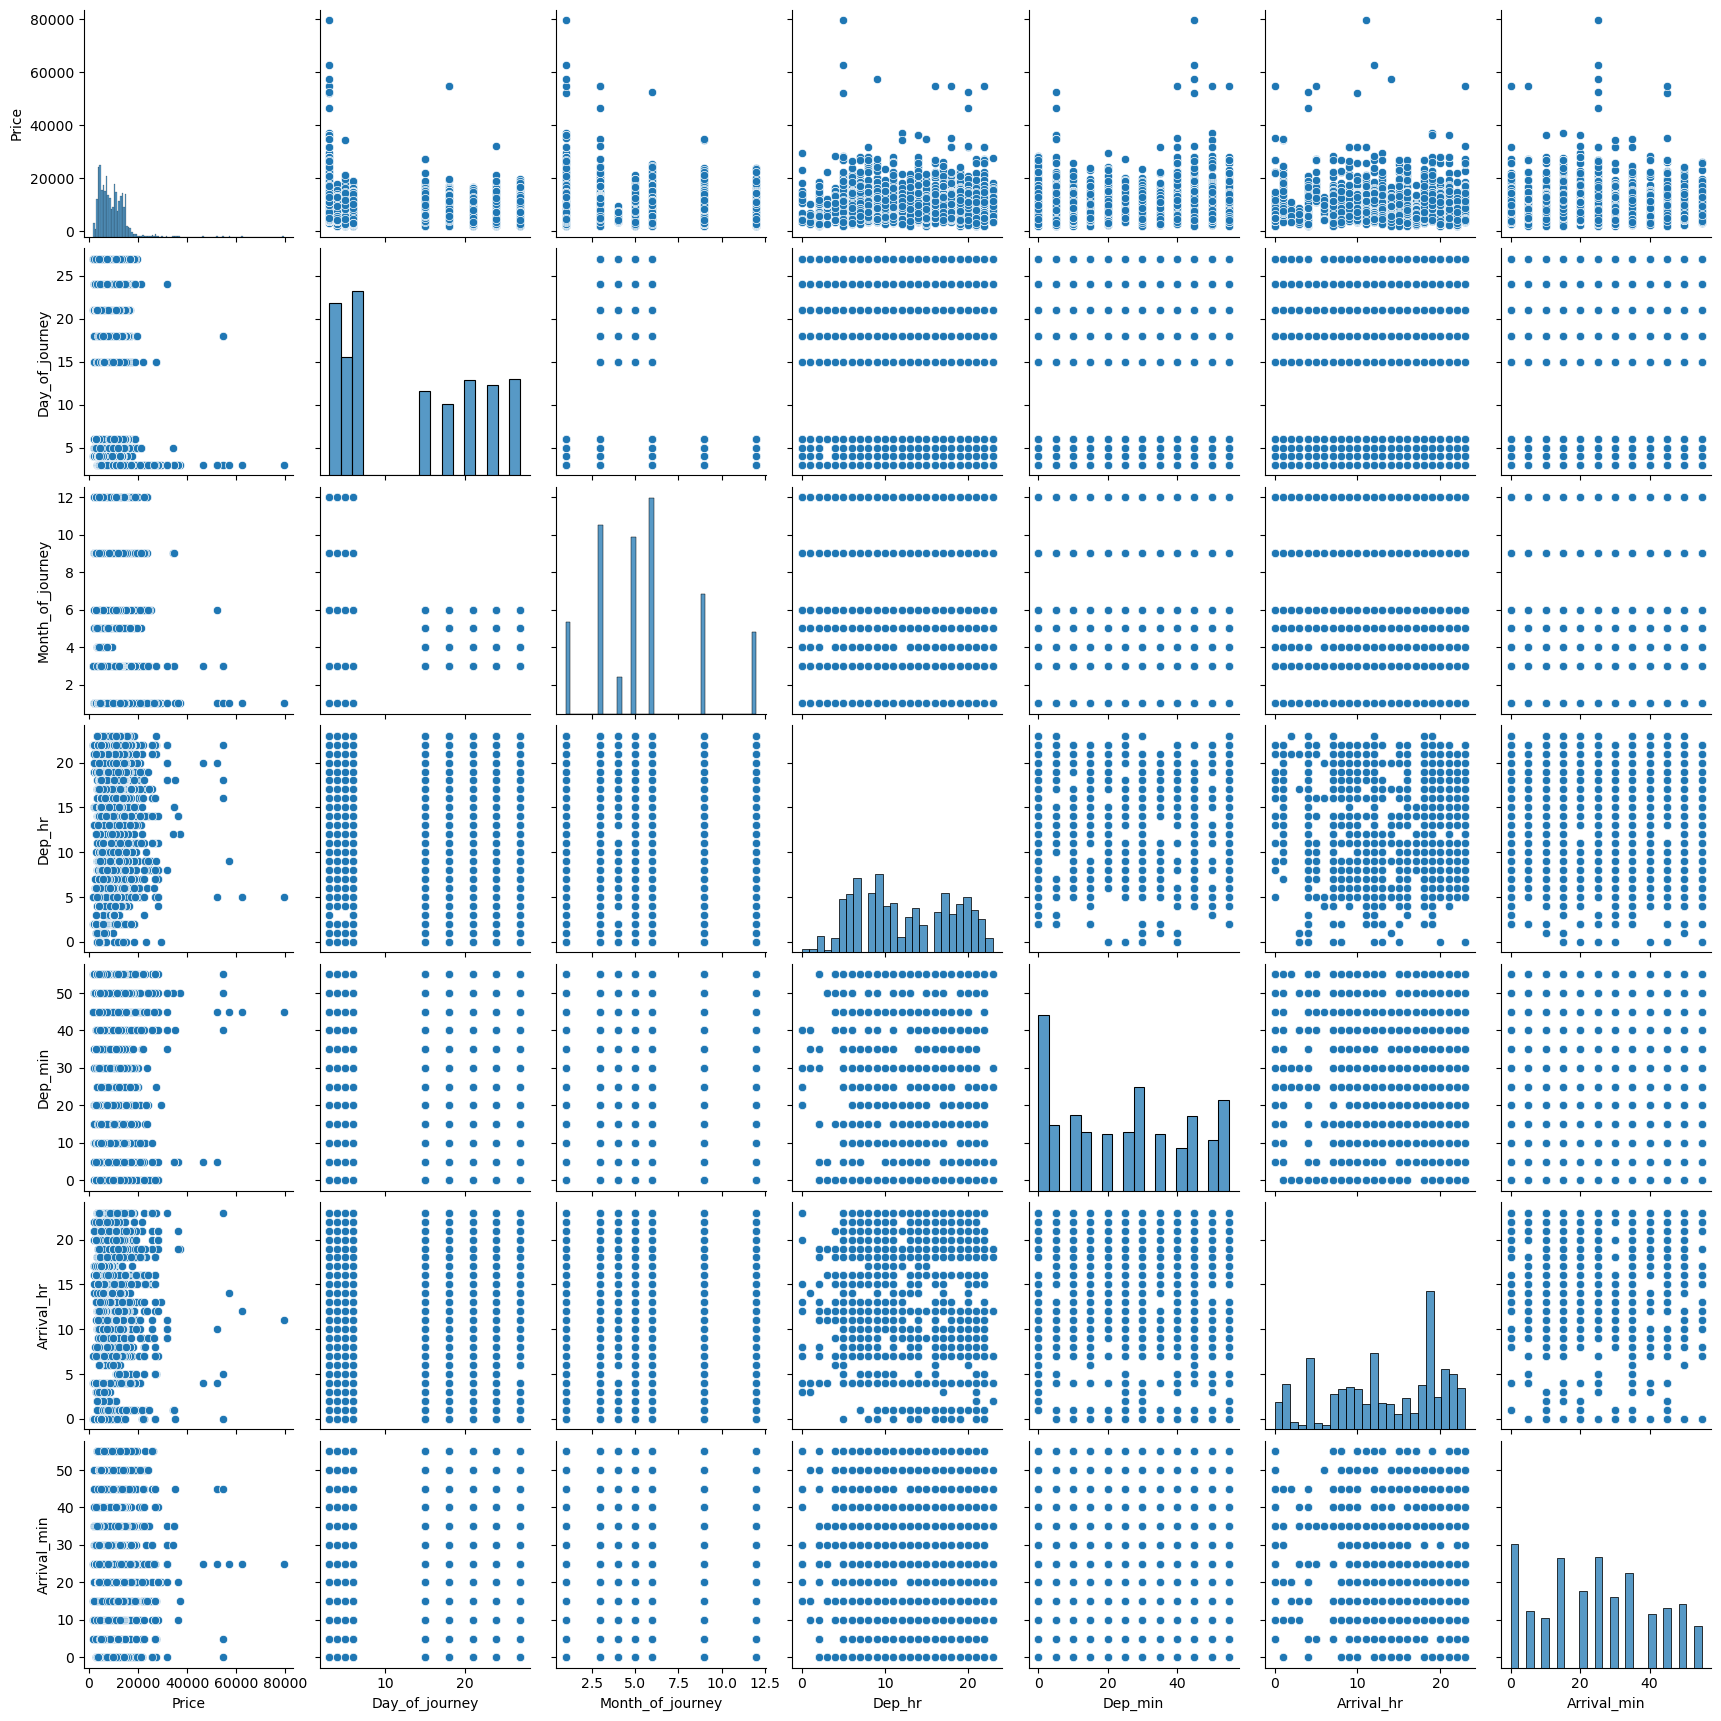

In [71]:
sb.pairplot(df1)

In [72]:
df=pd.get_dummies(df1,drop_first=True)
df

,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,duration_min_15,duration_min_20,duration_min_25,duration_min_30,duration_min_35,duration_min_40,duration_min_45,duration_min_5,duration_min_50,duration_min_55
0,3897,24,3,22,20,1,10,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,7662,5,1,5,50,13,15,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,13882,6,9,9,25,4,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6218,5,12,18,5,23,30,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,13302,3,1,16,50,21,35,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,4145,27,4,20,45,23,20,1,0,0,...,0,0,0,0,1,0,0,0,0,0
10680,7229,27,4,8,20,11,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10681,12648,3,1,11,30,14,10,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
df.columns

Index(['Price', 'Day_of_journey', 'Month_of_journey', 'Dep_hr', 'Dep_min',
       'Arrival_hr', 'Arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo',
       ...
       'duration_min_15', 'duration_min_20', 'duration_min_25',
       'duration_min_30', 'duration_min_35', 'duration_min_40',
       'duration_min_45', 'duration_min_5', 'duration_min_50',
       'duration_min_55'],
      dtype='object', length=219)

In [74]:
df1['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [75]:
#Handling Categorical Values 
df1['Total_Stops']=df1['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df1['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df1[['Source','Destination']],drop_first=True)
df1=pd.concat([air_dummy,source_dest_dummy,df1],axis=1)

In [76]:
df1.head(5)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [77]:
df1.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [78]:
df1.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [79]:
df1.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_journey',
       'Month_of_journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

# Now Feature Engeering for Test Data

In [80]:
df2['Date_of_Journey']=pd.to_datetime(df2['Date_of_Journey'])
df2['Day_of_Journey']=(df2['Date_of_Journey']).dt.day
df2['Month_of_Journey']=(df2['Date_of_Journey']).dt.month

#Dep_time 
df2['Dep_hr']=pd.to_datetime(df2['Dep_Time']).dt.hour
df2['Dep_min']=pd.to_datetime(df2['Dep_Time']).dt.minute

#Arrival_time
df2['Arrival_hr']=pd.to_datetime(df2['Arrival_Time']).dt.hour
df2['Arrival_min']=pd.to_datetime(df2['Arrival_Time']).dt.minute

#Splitting duration  time

a=df2['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df2['dur_hr']=a[0].apply(lambda x: x[:-1])
df2['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df2.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df2['Total_Stops']=df2['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df2['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df2[['Source','Destination']],drop_first=True)
df2=pd.concat([air_dummy,source_dest_dummy,df2],axis=1)


E:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

In [81]:
df2.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [82]:
print('train_shape',df1.shape)
print('test_shape',df2.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [83]:
df1.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [84]:
x=df1.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df1['Price']

In [85]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


## Building the Models 

In [94]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [95]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x_train,y_train)

ExtraTreesRegressor()

In [96]:
ET_Model.feature_importances_

array([1.11898697e-02, 2.03535301e-03, 1.24159322e-02, 1.36215840e-01,
       8.18942937e-02, 2.76638091e-02, 1.05015900e-03, 4.89888400e-03,
       5.82453829e-05, 4.94975314e-03, 3.34274472e-05, 8.91420040e-04,
       3.09691148e-03, 5.45822890e-03, 7.52449998e-03, 2.95021646e-03,
       1.44299007e-02, 7.69640381e-03, 9.07194699e-04, 2.54339397e-01,
       1.08673551e-01, 8.35316300e-02, 2.54269356e-02, 2.26599709e-02,
       2.64817996e-02, 2.13511232e-02, 1.14594352e-01, 1.75808982e-02])

In [101]:
y_pred=ET_Model.predict(x_test)
y_pred

array([10844.  ,  4152.14,  6259.93, ..., 11048.42, 10922.7 ,  8338.81])

In [103]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7701819952715244


In [105]:
from sklearn.ensemble import RandomForestRegressor

RF_Model=RandomForestRegressor()
RF_Model.fit(x_train,y_train)

y_predict=RF_Model.predict(x_test)

r2_score(y_test,y_predict)

0.7894789487710766

In [106]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
rCV.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [108]:
rf_pred=rCV.predict(x_test)
rf_pred

array([12531.22906572,  4289.06886829,  6127.8378807 , ...,
       11674.65645656,  9809.90632587,  8668.35002083])

In [110]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1156.3626026215618
MSE 3959749.295805364


In [111]:
r2_score(y_test,rf_pred)

0.807158279620613

In [112]:
!pip install catboost

In [113]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(x_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 219ms	remaining: 3m 38s
1:	learn: 4317.7245126	total: 223ms	remaining: 1m 51s
2:	learn: 4167.9871081	total: 227ms	remaining: 1m 15s
3:	learn: 4030.4839609	total: 231ms	remaining: 57.6s
4:	learn: 3906.4844760	total: 235ms	remaining: 46.8s
5:	learn: 3785.4580402	total: 239ms	remaining: 39.6s
6:	learn: 3673.8662552	total: 243ms	remaining: 34.5s
7:	learn: 3582.0533069	total: 247ms	remaining: 30.6s
8:	learn: 3495.5629367	total: 251ms	remaining: 27.6s
9:	learn: 3404.7478335	total: 256ms	remaining: 25.3s
10:	learn: 3325.1004431	total: 260ms	remaining: 23.4s
11:	learn: 3254.1004651	total: 264ms	remaining: 21.7s
12:	learn: 3184.6084064	total: 268ms	remaining: 20.3s
13:	learn: 3122.3064005	total: 272ms	remaining: 19.1s
14:	learn: 3067.6550706	total: 276ms	remaining: 18.1s
15:	learn: 3014.5169632	total: 279ms	remaining: 17.2s
16:	learn: 2962.4252595	total: 283ms	remaining: 16.4s
17:	learn: 2920.1931240	total: 288ms	remaining: 15.7s
18:	l

179:	learn: 1912.4008242	total: 1s	remaining: 4.58s
180:	learn: 1909.3596736	total: 1.01s	remaining: 4.58s
181:	learn: 1906.4143993	total: 1.02s	remaining: 4.57s
182:	learn: 1905.0535079	total: 1.02s	remaining: 4.57s
183:	learn: 1902.8146373	total: 1.03s	remaining: 4.57s
184:	learn: 1901.7193607	total: 1.03s	remaining: 4.56s
185:	learn: 1899.7272699	total: 1.04s	remaining: 4.55s
186:	learn: 1898.5304244	total: 1.05s	remaining: 4.55s
187:	learn: 1897.0739098	total: 1.05s	remaining: 4.54s
188:	learn: 1894.5016873	total: 1.05s	remaining: 4.53s
189:	learn: 1892.5209273	total: 1.06s	remaining: 4.51s
190:	learn: 1890.9588410	total: 1.06s	remaining: 4.5s
191:	learn: 1889.7128491	total: 1.07s	remaining: 4.49s
192:	learn: 1888.8885955	total: 1.07s	remaining: 4.48s
193:	learn: 1888.0018393	total: 1.08s	remaining: 4.47s
194:	learn: 1887.0114729	total: 1.08s	remaining: 4.46s
195:	learn: 1886.1149584	total: 1.08s	remaining: 4.45s
196:	learn: 1885.0633608	total: 1.09s	remaining: 4.45s
197:	learn: 18

331:	learn: 1736.8836345	total: 1.66s	remaining: 3.35s
332:	learn: 1734.9438421	total: 1.67s	remaining: 3.35s
333:	learn: 1733.7663980	total: 1.68s	remaining: 3.34s
334:	learn: 1733.7502070	total: 1.68s	remaining: 3.33s
335:	learn: 1731.9563686	total: 1.68s	remaining: 3.33s
336:	learn: 1730.6458723	total: 1.69s	remaining: 3.32s
337:	learn: 1729.5742529	total: 1.69s	remaining: 3.32s
338:	learn: 1728.1147530	total: 1.7s	remaining: 3.31s
339:	learn: 1726.8427007	total: 1.7s	remaining: 3.31s
340:	learn: 1725.5289298	total: 1.71s	remaining: 3.3s
341:	learn: 1725.5131812	total: 1.71s	remaining: 3.29s
342:	learn: 1724.5684496	total: 1.72s	remaining: 3.29s
343:	learn: 1723.4357272	total: 1.72s	remaining: 3.28s
344:	learn: 1722.4498462	total: 1.72s	remaining: 3.27s
345:	learn: 1721.3726857	total: 1.73s	remaining: 3.27s
346:	learn: 1720.8368740	total: 1.73s	remaining: 3.26s
347:	learn: 1719.7146510	total: 1.74s	remaining: 3.25s
348:	learn: 1719.7013755	total: 1.74s	remaining: 3.25s
349:	learn: 1

516:	learn: 1596.4662235	total: 2.45s	remaining: 2.29s
517:	learn: 1595.7400145	total: 2.45s	remaining: 2.28s
518:	learn: 1595.0085465	total: 2.46s	remaining: 2.28s
519:	learn: 1594.2497150	total: 2.46s	remaining: 2.27s
520:	learn: 1594.2395205	total: 2.47s	remaining: 2.27s
521:	learn: 1594.2342023	total: 2.47s	remaining: 2.26s
522:	learn: 1593.7343689	total: 2.48s	remaining: 2.26s
523:	learn: 1593.2990136	total: 2.48s	remaining: 2.25s
524:	learn: 1593.2937802	total: 2.48s	remaining: 2.25s
525:	learn: 1592.4805278	total: 2.52s	remaining: 2.27s
526:	learn: 1591.3318756	total: 2.53s	remaining: 2.27s
527:	learn: 1590.7243695	total: 2.54s	remaining: 2.27s
528:	learn: 1590.6774548	total: 2.54s	remaining: 2.27s
529:	learn: 1590.2788358	total: 2.55s	remaining: 2.26s
530:	learn: 1589.4259231	total: 2.56s	remaining: 2.26s
531:	learn: 1588.7541581	total: 2.56s	remaining: 2.25s
532:	learn: 1588.7451407	total: 2.57s	remaining: 2.25s
533:	learn: 1588.1264081	total: 2.57s	remaining: 2.24s
534:	learn

686:	learn: 1510.0110239	total: 3.25s	remaining: 1.48s
687:	learn: 1509.5392213	total: 3.25s	remaining: 1.48s
688:	learn: 1508.9889445	total: 3.26s	remaining: 1.47s
689:	learn: 1508.5729999	total: 3.26s	remaining: 1.46s
690:	learn: 1508.2083591	total: 3.26s	remaining: 1.46s
691:	learn: 1508.2039384	total: 3.27s	remaining: 1.45s
692:	learn: 1507.6940263	total: 3.27s	remaining: 1.45s
693:	learn: 1507.6896705	total: 3.27s	remaining: 1.44s
694:	learn: 1507.2664677	total: 3.28s	remaining: 1.44s
695:	learn: 1506.7337350	total: 3.28s	remaining: 1.43s
696:	learn: 1506.0049773	total: 3.29s	remaining: 1.43s
697:	learn: 1505.8498603	total: 3.29s	remaining: 1.42s
698:	learn: 1505.1210197	total: 3.29s	remaining: 1.42s
699:	learn: 1504.8431871	total: 3.3s	remaining: 1.41s
700:	learn: 1504.0961695	total: 3.3s	remaining: 1.41s
701:	learn: 1503.6307857	total: 3.3s	remaining: 1.4s
702:	learn: 1503.4967588	total: 3.31s	remaining: 1.4s
703:	learn: 1503.0202683	total: 3.31s	remaining: 1.39s
704:	learn: 150

858:	learn: 1443.9967240	total: 3.85s	remaining: 631ms
859:	learn: 1443.5781682	total: 3.85s	remaining: 627ms
860:	learn: 1443.2678628	total: 3.85s	remaining: 622ms
861:	learn: 1443.2031726	total: 3.86s	remaining: 618ms
862:	learn: 1443.0320211	total: 3.86s	remaining: 613ms
863:	learn: 1442.7373056	total: 3.87s	remaining: 608ms
864:	learn: 1442.3124627	total: 3.87s	remaining: 604ms
865:	learn: 1442.3091257	total: 3.87s	remaining: 599ms
866:	learn: 1441.7809279	total: 3.88s	remaining: 595ms
867:	learn: 1441.6266369	total: 3.88s	remaining: 590ms
868:	learn: 1441.4770548	total: 3.88s	remaining: 586ms
869:	learn: 1441.3138175	total: 3.89s	remaining: 581ms
870:	learn: 1440.8453966	total: 3.89s	remaining: 576ms
871:	learn: 1440.5893895	total: 3.89s	remaining: 572ms
872:	learn: 1440.4814841	total: 3.9s	remaining: 567ms
873:	learn: 1440.4189430	total: 3.9s	remaining: 562ms
874:	learn: 1440.4168150	total: 3.9s	remaining: 558ms
875:	learn: 1440.4134247	total: 3.9s	remaining: 553ms
876:	learn: 14

In [114]:
cat_pred=cat.predict(x_test)

In [115]:
r2_score(y_test,cat_pred)

0.8273858089678572

In [116]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 241.1 kB/s eta 0:00:00


In [120]:
x_train[['duration_hr','duration_min']]=x_train[['duration_hr','duration_min']].astype(int)
x_test[['duration_hr','duration_min']]=x_test[['duration_hr','duration_min']].astype(int)

In [121]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(x_train,y_train)

LGBMRegressor()

In [122]:
lgb_pred=lgb_model.predict(x_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [123]:
!pip install xgboost

In [124]:
import xgboost as xgb

xgb_model=xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)

xgb_pred=xgb_model.predict(x_test)

r2_score(y_test,xgb_pred)

0.8212496825906317

In [125]:
df1.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [126]:
# #Use pickle to save our model so that we can use it later

# import pickle 
# # Saving model to disk
# pickle.dump(CAT_Model, open('model.pkl','wb'))
# model=pickle.load(open('model.pkl','rb'))

In [127]:
df1.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_journey',
       'Month_of_journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [129]:
deploy_df=df1.drop(['Route','Additional_Info'],axis=1)

In [130]:
deploy_df.to_csv('deploy_df')

In [131]:
!pip install flask_cors